<a href="https://colab.research.google.com/github/BrightonOtieno/TensorflowModel-To-jsonModel/blob/main/passed_to_js.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs==1.2.9


     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 17.3MB 261kB/s 
     |████████████████████████████████| 2.8MB 45.9MB/s 
     |████████████████████████████████| 109.2MB 36kB/s 
     |████████████████████████████████| 317kB 46.6MB/s 
     |████████████████████████████████| 256kB 47.5MB/s 
     |████████████████████████████████| 491kB 24.4MB/s 
     |████████████████████████████████| 3.2MB 44.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32852 sha256=4eccf90bd2f149fa2b2071dd809feff0ff25e01a96c90bf0fb2f86819279f3e2
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
ERROR: nbclient 0.5.1 has requirement jupyter

In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 76kB/s 
     |████████████████████████████████| 3.8MB 46.8MB/s 
     |████████████████████████████████| 450kB 41.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=384b889657df94e12bdd6b2e8dd7c9348788edd26cac55b29f02f1d9f29b7048
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflowjs 1.2.9 has requirement tensorflow==1.14.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstall

In [ ]:
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.0.0


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-10-31 12:51:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  36.0MB/s    in 1.8s    

2020-10-31 12:51:45 (36.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.213.jpg', 'cat.468.jpg', 'cat.463.jpg', 'cat.592.jpg', 'cat.445.jpg', 'cat.348.jpg', 'cat.220.jpg', 'cat.60.jpg', 'cat.588.jpg', 'cat.208.jpg']
['dog.498.jpg', 'dog.813.jpg', 'dog.780.jpg', 'dog.442.jpg', 'dog.794.jpg', 'dog.327.jpg', 'dog.635.jpg', 'dog.30.jpg', 'dog.579.jpg', 'dog.108.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

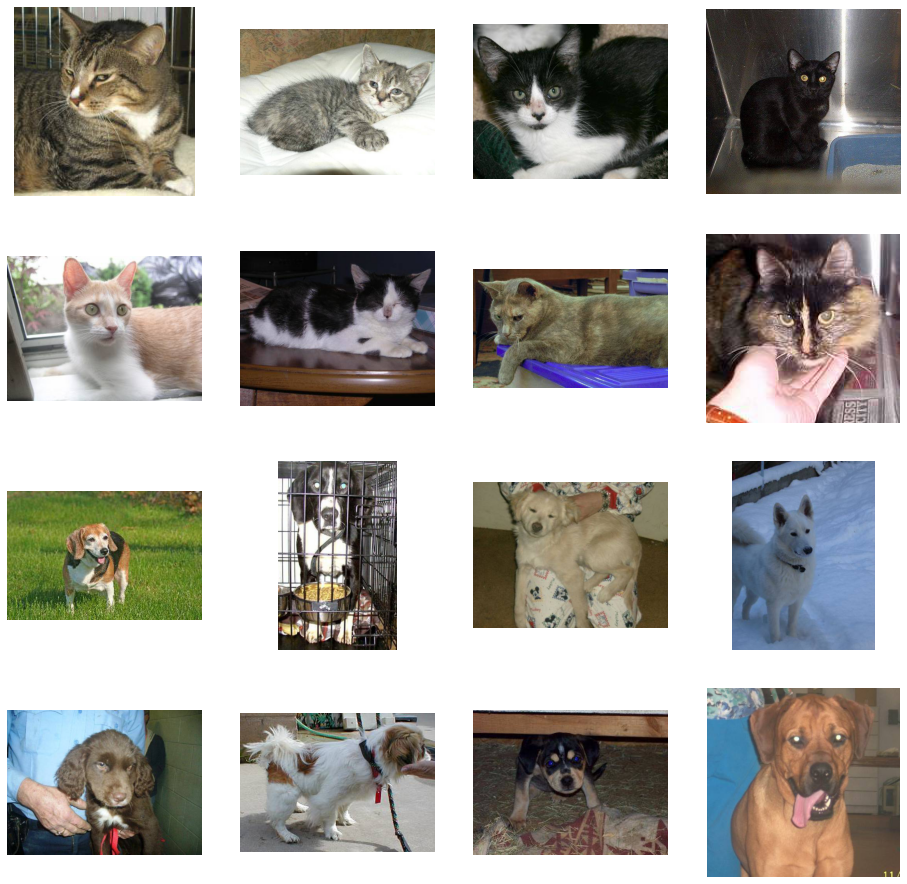

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 67s - loss: 0.9862 - accuracy: 0.5370 - val_loss: 0.6769 - val_accuracy: 0.6080
Epoch 2/15
100/100 - 64s - loss: 0.6914 - accuracy: 0.6190 - val_loss: 0.6565 - val_accuracy: 0.6250
Epoch 3/15
100/100 - 64s - loss: 0.6141 - accuracy: 0.6840 - val_loss: 0.6300 - val_accuracy: 0.6610
Epoch 4/15
100/100 - 64s - loss: 0.5273 - accuracy: 0.7435 - val_loss: 0.6404 - val_accuracy: 0.6500
Epoch 5/15
100/100 - 64s - loss: 0.4274 - accuracy: 0.7925 - val_loss: 0.8727 - val_accuracy: 0.6350
Epoch 6/15
100/100 - 64s - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.7494 - val_accuracy: 0.6870
Epoch 7/15
100/100 - 64s - loss: 0.2427 - accuracy: 0.9005 - val_loss: 0.8465 - val_accuracy: 0.6960
Epoch 8/15
100/100 - 64s - loss: 0.1583 - accuracy: 0.9375 - val_loss: 1.0469 - val_accuracy: 0.6950
Epoch 9/15
100/100 - 64s - loss: 0.1076 - accuracy: 0.9605 - val_loss: 1.4195 - val_accuracy: 0.6730
Epoch 10/15
100/100 - 64s - loss: 0.1044 - accur

Text(0.5, 1.0, 'Training and validation loss')

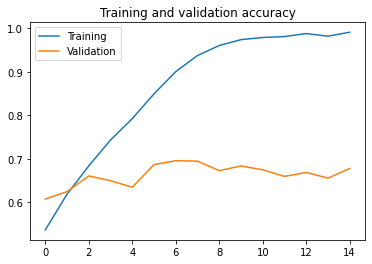

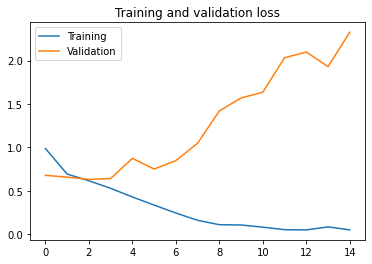

In [ ]:

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:

# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"
model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    ./my_model.h5 \
    ./my_model-h5